In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cns = pd.read_csv('../../Data/Downloaded/pre_cns.csv')
df_emp = pd.read_csv('../../Data/Downloaded/pre_emp.csv')
df_cap = pd.read_csv('../../Data/Downloaded/pre_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded/pre_GDP.csv')
df_pi  = pd.read_csv('../../Data/Downloaded/pre_price.csv')

In [3]:
df_cap

,year_wst,prm_cap,non_prm_cap
0,1881,3144,1359
1,1882,3150,1399
2,1883,3154,1438
3,1884,3157,1481
4,1885,3157,1525
5,1886,3159,1708
6,1887,3163,1790
7,1888,3169,1875
8,1889,3176,1965
9,1890,3185,2069


In [4]:
df_pi = df_pi.iloc[:60,]

In [5]:
df_pi['year_wst'] = df_pi.year_wst.astype(int)

In [6]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.66
α_LM  = 0.34
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [7]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_cns['c_M_t'] = df_cns['non_food_cns']
df_cns['c_M_t+1'] = df_cns['non_food_cns'].shift(-1)

In [8]:
df_cns['c_M_t/c_M_t+1'] = df_cns['c_M_t'] / df_cns['c_M_t+1']

In [9]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_pi['p_M_t'] = df_pi['price_ind_inv']
df_pi['p_M_t+1'] = df_pi['price_ind_inv'].shift(-1)

In [10]:
df_pi['p_M_t+1/p_M_t'] = df_pi['p_M_t+1'] / df_pi['p_M_t']

In [11]:
df_GDP_cap = pd.merge(df_GDP[['year_wst', 'non_prm_GDP']],
                      df_cap[['year_wst', 'non_prm_cap']], on = 'year_wst')

In [12]:
df_GDP_cap['F_KM'] = α_KM * df_GDP_cap['non_prm_GDP'] / df_GDP_cap['non_prm_cap']

In [13]:
# real return on capital 
# note that we need α_KM * Y_M_t+1/K_M_t
df_GDP_cap['real_roc'] = 1 - δ + df_GDP_cap['F_KM'].shift(-1)

In [14]:
df_temp = pd.merge(df_GDP_cap[['year_wst', 'F_KM']], 
                     df_cns[['year_wst', 'c_M_t/c_M_t+1']],
                    on = 'year_wst')

In [15]:
df_merged = pd.merge(df_temp, df_pi[['year_wst', 'p_M_t+1/p_M_t', 'p_M_t']],
                     on = 'year_wst', how = 'inner')

In [16]:
df_merged['intertemporal_wedge'] = β * df_merged['c_M_t/c_M_t+1'] \
                                     * (df_merged['F_KM'].shift(-1) / df_merged['p_M_t']
                                        + (1-δ) * df_merged['p_M_t+1/p_M_t'])

In [17]:
df_merged['intertemporal_wedge-1'] = df_merged['intertemporal_wedge'] - 1

In [18]:
df_merged['intertemporal_wedge_test'] = β * df_merged['c_M_t/c_M_t+1'] * df_merged['p_M_t+1/p_M_t'] \
                                     * (df_merged['F_KM'].shift(-1) +1 - δ)

In [19]:
df_merged['intertemporal_wedge_test-1'] = df_merged['intertemporal_wedge_test'] - 1

<AxesSubplot:xlabel='year_wst'>

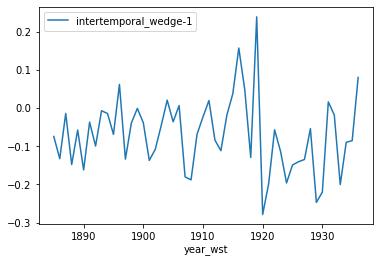

In [20]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge-1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

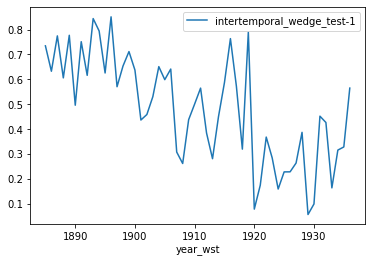

In [21]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge_test-1', ax = ax)

<AxesSubplot:xlabel='year_wst'>

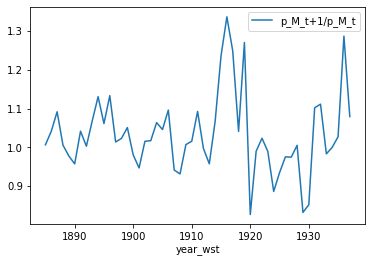

In [22]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t+1/p_M_t', ax = ax)

<AxesSubplot:xlabel='year_wst'>

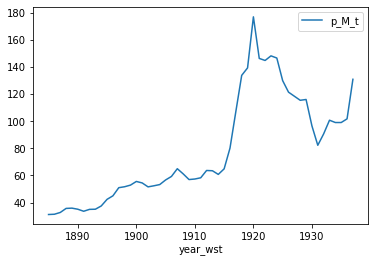

In [23]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'p_M_t', ax = ax)

In [24]:
df_merged['F_KM/p_M'] = df_merged['F_KM'] / df_merged['p_M_t']

<AxesSubplot:xlabel='year_wst'>

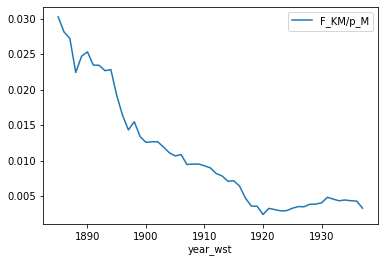

In [25]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_KM/p_M', ax = ax)

<AxesSubplot:xlabel='year_wst'>

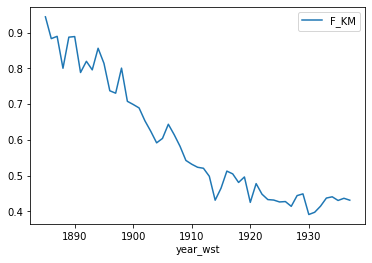

In [26]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'F_KM', ax = ax)

<AxesSubplot:xlabel='year_wst'>

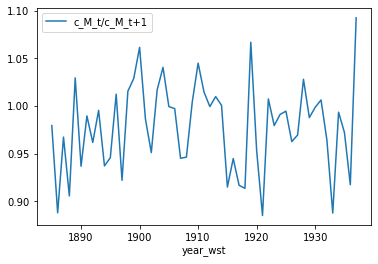

In [27]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'c_M_t/c_M_t+1', ax = ax)

In [28]:
df_merged['C_t/C_t+1'] = df_merged['c_M_t/c_M_t+1'] * df_merged['p_M_t+1/p_M_t']

<AxesSubplot:xlabel='year_wst'>

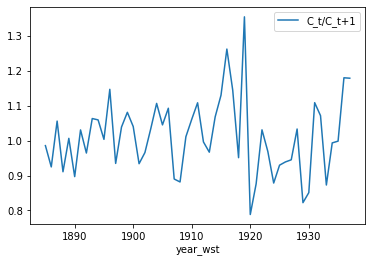

In [29]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'C_t/C_t+1', ax = ax)

In [30]:
df_merged['C_t+1/C_t'] = 1/ df_merged['C_t/C_t+1']

<AxesSubplot:xlabel='year_wst'>

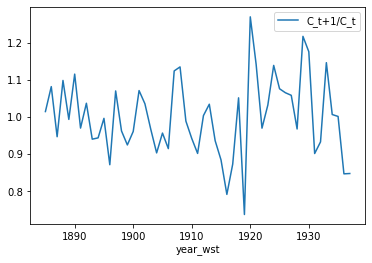

In [31]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'C_t+1/C_t', ax = ax)

In [32]:
df_merged['roc_real'] = df_merged['F_KM'].shift(-1) / df_merged['p_M_t'] + 1 -δ

<AxesSubplot:xlabel='year_wst'>

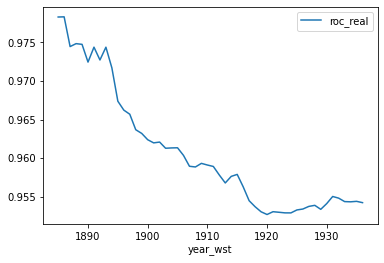

In [33]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'roc_real', ax = ax)

In [34]:
df_merged['roc_test'] = df_merged['F_KM'].shift(-1)  + 1 -δ

<AxesSubplot:xlabel='year_wst'>

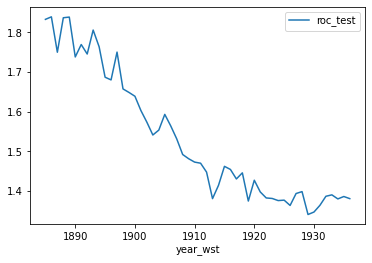

In [35]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'roc_test', ax = ax)

In [36]:
df_merged.to_csv('../../Data/Results/pre_inter_w.csv', index = False)

In [37]:
df_merged

,year_wst,F_KM,c_M_t/c_M_t+1,p_M_t+1/p_M_t,p_M_t,intertemporal_wedge,intertemporal_wedge-1,intertemporal_wedge_test,intertemporal_wedge_test-1,F_KM/p_M,C_t/C_t+1,C_t+1/C_t,roc_real,roc_test
0,1885,0.943908,0.979528,1.006410,31.2,0.925668,-0.074332,1.734669,0.734669,0.030253,0.985807,1.014397,0.978300,1.832963
1,1886,0.882963,0.887953,1.041401,31.4,0.867484,-0.132516,1.632832,0.632832,0.028120,0.924715,1.081414,0.978323,1.839341
2,1887,0.889341,0.967499,1.091743,32.7,0.986035,-0.013965,1.774615,0.774615,0.027197,1.056260,0.946736,0.974468,1.750096
3,1888,0.800096,0.905688,1.005602,35.7,0.852219,-0.147781,1.606194,0.606194,0.022412,0.910762,1.097981,0.974847,1.837053
4,1889,0.887053,1.029664,0.977716,35.9,0.942598,-0.057402,1.777031,0.777031,0.024709,1.006719,0.993326,0.974755,1.838719
5,1890,0.888719,0.936875,0.957265,35.1,0.838113,-0.161887,1.496520,0.496520,0.025320,0.896838,1.115029,0.972456,1.738191
6,1891,0.788191,0.989712,1.041667,33.6,0.963400,-0.036600,1.751323,0.751323,0.023458,1.030950,0.969980,0.974391,1.769529
7,1892,0.819529,0.961828,1.002857,35.0,0.900683,-0.099317,1.616415,0.616415,0.023415,0.964576,1.036724,0.972731,1.745601
8,1893,0.795601,0.995536,1.068376,35.1,0.993317,-0.006683,1.844041,0.844041,0.022667,1.063607,0.940197,0.974388,1.806002
9,1894,0.856002,0.937255,1.130667,37.5,0.985995,-0.014005,1.794415,0.794415,0.022827,1.059723,0.943642,0.971702,1.763840


In [38]:
df_merged.loc[:15]['intertemporal_wedge-1'].mean()

-0.060142231689434826